In [356]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h3
from IPython.display import Image

##### Hypothesis & Assumptions
- Street flooding, sewer backups, and manhole discharge are all indicators of sewer failure.
- Sewer backup is a proxy for basement flooding. 
- Minor Street flooding can occur in local pockets due to individual clogged drains (need to identify & remove). 
- Street flooding can indicate major sewer failures when co-occuring with sewer backups and manhole discharge. 
- Street flooding is related to sewer backup, likely occuring with a delay and not as extreme as sewer backups. 
- Street flooding is flashier than sewer backup, peaking and resolving quickly in most areas. 
- Manhole discharge is the most extreme indictor of sewer failure as it requires considerable underground pressure. 
- Each sewershed drainage system acts independantly. Neighboring systems may recieve simliar amounts of precipitation, but failure in one does not equal failure in another.
- MS4 system failures are indicated by complaints in MS4 areas, which are made worse in combination with high tide and high gauge activity because of their downstream connectivity with the natural hydrology. 
- Combined sewer failures are indicated by complaints outside of MS4 areas and may eventually result in discharge violations. 
- MS4 drainage systems must be considered in context of their local tidal system as tide conditions vary across time and space. 

##### import borough boundaries

In [371]:
# Download shapefile from: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
boro_url = "C:/Users/Prisc/Desktop/NYC_Flood/Boro/geo_export_2310ea16-4f2b-4d54-840a-669eb7aff1c0.shp"
boro = gpd.read_file(boro_url)

##### Query & Download 311 data from NYC Open Data

In [ ]:
#Approximate SQL: 
"""
SELECT * WHERE    
    agency = 'DEP' 
    AND complaint_type IN ('sewer','sewer maintenance')
    AND created_date BETWEEN '2023-09-28T09:15:00' AND '2023-10-04T23:45:00'
ORDER BY created_date
"""

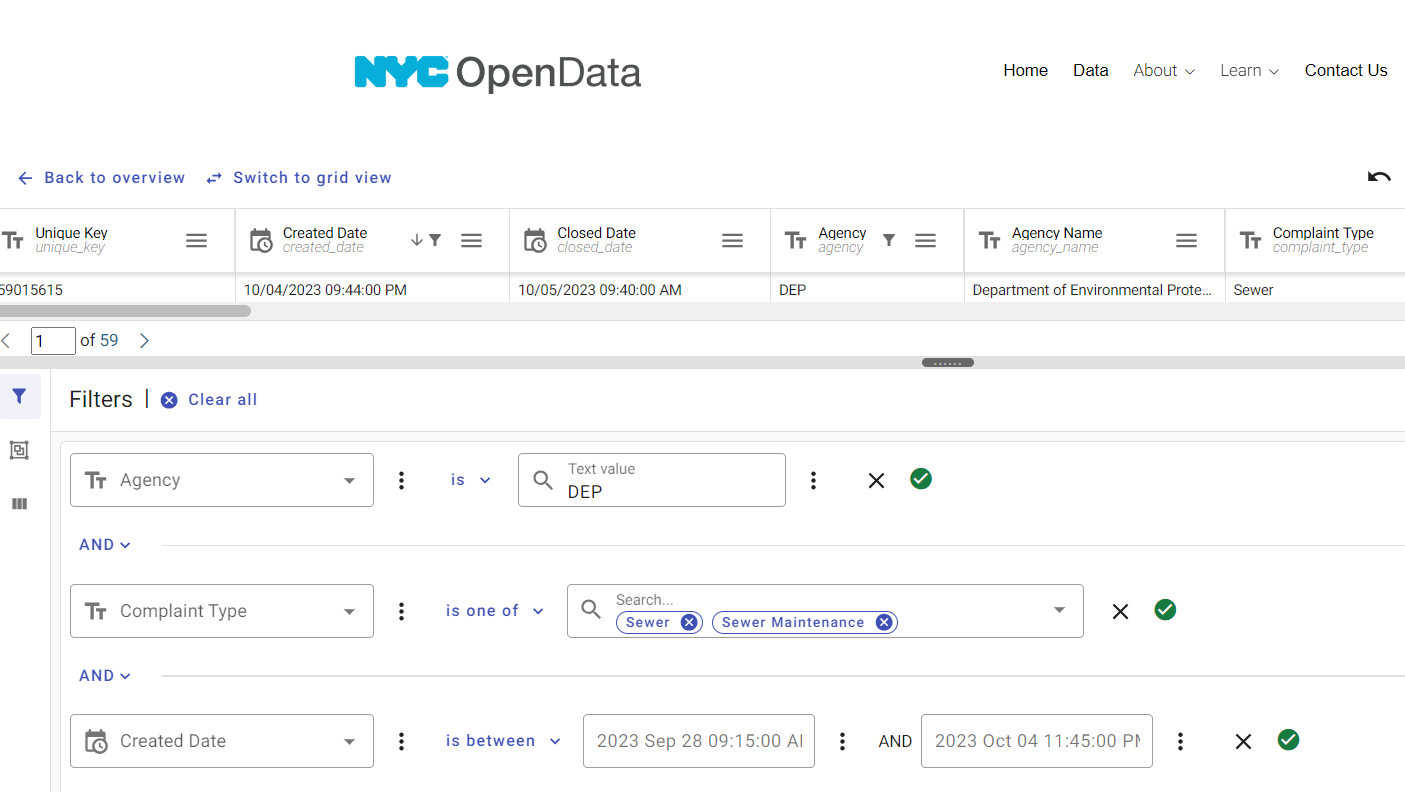

In [368]:
Image(r"C:\Users\Prisc\Pictures\Screenshots\Screenshot 2024-08-15 102807.png")

##### Click link below for exact result with query applied:

In [366]:
print("https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/explore/query/SELECT%0A%20%20%60unique_key%60%2C%0A%20%20%60created_date%60%2C%0A%20%20%60closed_date%60%2C%0A%20%20%60agency%60%2C%0A%20%20%60agency_name%60%2C%0A%20%20%60complaint_type%60%2C%0A%20%20%60descriptor%60%2C%0A%20%20%60location_type%60%2C%0A%20%20%60incident_zip%60%2C%0A%20%20%60incident_address%60%2C%0A%20%20%60street_name%60%2C%0A%20%20%60cross_street_1%60%2C%0A%20%20%60cross_street_2%60%2C%0A%20%20%60intersection_street_1%60%2C%0A%20%20%60intersection_street_2%60%2C%0A%20%20%60address_type%60%2C%0A%20%20%60city%60%2C%0A%20%20%60landmark%60%2C%0A%20%20%60facility_type%60%2C%0A%20%20%60status%60%2C%0A%20%20%60due_date%60%2C%0A%20%20%60resolution_description%60%2C%0A%20%20%60resolution_action_updated_date%60%2C%0A%20%20%60community_board%60%2C%0A%20%20%60bbl%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60x_coordinate_state_plane%60%2C%0A%20%20%60y_coordinate_state_plane%60%2C%0A%20%20%60open_data_channel_type%60%2C%0A%20%20%60park_facility_name%60%2C%0A%20%20%60park_borough%60%2C%0A%20%20%60vehicle_type%60%2C%0A%20%20%60taxi_company_borough%60%2C%0A%20%20%60taxi_pick_up_location%60%2C%0A%20%20%60bridge_highway_name%60%2C%0A%20%20%60bridge_highway_direction%60%2C%0A%20%20%60road_ramp%60%2C%0A%20%20%60bridge_highway_segment%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60%3A%40computed_region_efsh_h5xi%60%2C%0A%20%20%60%3A%40computed_region_f5dn_yrer%60%2C%0A%20%20%60%3A%40computed_region_yeji_bk3q%60%2C%0A%20%20%60%3A%40computed_region_92fq_4b7q%60%2C%0A%20%20%60%3A%40computed_region_sbqj_enih%60%2C%0A%20%20%60%3A%40computed_region_7mpf_4k6g%60%0AWHERE%0A%20%20caseless_eq%28%60agency%60%2C%20%22DEP%22%29%0A%20%20AND%20%28caseless_one_of%28%60complaint_type%60%2C%20%22Sewer%22%2C%20%22Sewer%20Maintenance%22%29%0A%20%20%20%20%20%20%20%20%20AND%20%28%60created_date%60%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20BETWEEN%20%222023-09-28T09%3A15%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20AND%20%222023-10-04T23%3A45%3A00%22%20%3A%3A%20floating_timestamp%29%29%0AORDER%20BY%20%60created_date%60%20DESC%20NULL%20FIRST/page/filter")

https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/explore/query/SELECT%0A%20%20%60unique_key%60%2C%0A%20%20%60created_date%60%2C%0A%20%20%60closed_date%60%2C%0A%20%20%60agency%60%2C%0A%20%20%60agency_name%60%2C%0A%20%20%60complaint_type%60%2C%0A%20%20%60descriptor%60%2C%0A%20%20%60location_type%60%2C%0A%20%20%60incident_zip%60%2C%0A%20%20%60incident_address%60%2C%0A%20%20%60street_name%60%2C%0A%20%20%60cross_street_1%60%2C%0A%20%20%60cross_street_2%60%2C%0A%20%20%60intersection_street_1%60%2C%0A%20%20%60intersection_street_2%60%2C%0A%20%20%60address_type%60%2C%0A%20%20%60city%60%2C%0A%20%20%60landmark%60%2C%0A%20%20%60facility_type%60%2C%0A%20%20%60status%60%2C%0A%20%20%60due_date%60%2C%0A%20%20%60resolution_description%60%2C%0A%20%20%60resolution_action_updated_date%60%2C%0A%20%20%60community_board%60%2C%0A%20%20%60bbl%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60x_coordinate_state_plane%60%2C%0A%20%20%60y_coordinate_state_plane%60%2C%0A%20

#### Read and print initial set of columns for investigation

In [372]:
# Data aslo included in git repo
complaints_raw = pd.read_csv("C:/Users/Prisc/Desktop/NYC_Flood/311_Sewer_Complaints.csv")
complaints_raw.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Police Precinct'],
      dtype='object')

In [4]:
len(complaints_raw)

5757

In [62]:
complaints_raw.groupby('Complaint Type').size()

Complaint Type
Sewer                3058
Sewer Maintenance    2699
dtype: int64

In [375]:
complaints_brief = complaints_raw[['Created Date','Complaint Type', 'Descriptor', 
                            'Resolution Description', 'Location Type',        
                            'Incident Address', 'Incident Zip',        
                            'Borough', 'Latitude', 'Longitude', 'Location']]
complaints = complaints_brief.rename({'Created Date':'Date','Complaint Type':'Type', 'Descriptor':'Desc', 
                            'Resolution Description':'Resolution', 'Location Type':'Loc_Cat',        
                            'Incident Address':'Address', 'Incident Zip':'Zip',        
                            'Borough':'Boro', 'Latitude':'Lat', 'Longitude':'Lon', 'Location':'Geom'}, axis=1)

##### Investigate complete list of Descriptor types

In [6]:
complaints_brief.groupby('Descriptor').size()

Descriptor
Backup                                              1487
Catch Basin Clogged                                  512
Catch Basin Clogged/Flooding (Use Comments) (SC)     585
Catch Basin Grate Missing                              3
Catch Basin Grating Missing (SA4)                      2
Catch Basin Search (SC2)                              23
Catch Basin Sunken                                    18
Catch Basin Sunken/Damaged/Raised (SC1)               29
Culvert Blocked/Needs Cleaning (SE)                   52
Flooding on Highway                                   13
Flooding on Street                                   666
Highway Flooding (SH)                                 13
Manhole Cover Missing (Emergency) (SA3)               25
Manhole Overflow (Use Comments) (SA1)                 55
RAIN GARDEN DEBRIS (GIRGD)                             3
RAIN GARDEN PLANTING (GIRGP)                           2
RAIN GARDEN STRUCTURE (GIRGS)                          4
Sewer Backup (Use Co

#### Decision Logic - Filter complaint types & remove duplicates
- Removed resolution codes because every complaint location is duplicated to track how the agency resolved the issue. These duplicates are used to track metrics around response and customer service, but are an unnessary for this analysis. 
- Removed codes around rain garden maintenance, sewer ordor, missing catch basin grates, and missing manhole covers. 
- Culvert mentions are related to agency resolution, not complaints, so these were excluded
- Clogged catch basin codes were kept because reports during a rain event coincide with where citizens are observe flooding due to their malfunction. The 311 codes aren't good at capturing both a clogged drain and street flooding, so the more conservative approach is to assume that these conditions were coincident. 
- Drop undefined geometry
- Flooded highways typically aren't geocoded, so they fall out naturally

In [376]:
complaints = complaints.query("Desc in ['Backup','Catch Basin Clogged','Catch Basin Clogged/Flooding (Use Comments) (SC)','Flooding on Highway','Flooding on Street','Highway Flooding (SH)','Manhole Overflow (Use Comments) (SA1)','Sewer Backup (Use Comments) (SA)','Street Flooding (SJ)']").copy()
complaints = complaints.query("Resolution.isnull()", engine='python').copy()
complaints = complaints.query("Geom.notnull()", engine='python').copy()

#### Reclassify descriptions and second round of column reduction

In [378]:
reclassify_desc = {'Backup':'Sewer Backup','Catch Basin Clogged':'Street Flooding',
                   'Catch Basin Clogged/Flooding (Use Comments) (SC)':'Street Flooding',                   
                   'Flooding on Street':'Street Flooding',
                   'Manhole Overflow (Use Comments) (SA1)':'Street Flooding',
                   'Sewer Backup (Use Comments) (SA)':'Sewer Backup',
                   'Street Flooding (SJ)':'Street Flooding'}
complaints = complaints.replace({"Desc":reclassify_desc})
complaints = complaints[['Date', 'Desc','Address', 'Zip', 'Boro','Lat','Lon','Geom']]
complaints.head()

,Date,Desc,Address,Zip,Boro,Lat,Lon,Geom
1,10/04/2023 07:27:02 PM,Sewer Backup,54 SOUTH AVENUE,10303.0,STATEN ISLAND,40.638632,-74.166097,"(40.63863220521979, -74.16609743193443)"
3,10/04/2023 05:47:34 PM,Sewer Backup,145 LEONARD STREET,11206.0,BROOKLYN,40.708633,-73.946787,"(40.70863281897905, -73.94678711965021)"
5,10/04/2023 05:39:37 PM,Street Flooding,200-26 39 AVENUE,11361.0,QUEENS,40.762304,-73.784706,"(40.76230424225264, -73.78470617558845)"
7,10/04/2023 05:23:14 PM,Sewer Backup,1362 EAST 2 STREET,11230.0,BROOKLYN,40.616689,-73.973400,"(40.61668921273175, -73.97339959230925)"
12,10/04/2023 04:47:08 PM,Street Flooding,184 BRADHURST AVENUE,10039.0,MANHATTAN,40.826840,-73.940272,"(40.8268401158921, -73.94027170524997)"


##### Checking potential duplication issues

In [381]:
#same address, different time stamps - duplication allowed
complaints.query("Address == '226 AMBER STREET'")

,Date,Desc,Address,Zip,Boro,Lat,Lon,Geom
1391,09/30/2023 10:54:47 AM,Street Flooding,226 AMBER STREET,11208.0,BROOKLYN,40.671106,-73.858458,"(40.67110566469665, -73.85845755214845)"
5688,09/29/2023 06:08:00 AM,Sewer Backup,226 AMBER STREET,11208.0,BROOKLYN,40.671106,-73.858458,"(40.67110566469665, -73.85845755214845)"
5690,09/29/2023 06:04:53 AM,Sewer Backup,226 AMBER STREET,11208.0,BROOKLYN,40.671106,-73.858458,"(40.67110566469665, -73.85845755214845)"


In [382]:
complaints.groupby('Desc').size()

Desc
Sewer Backup       1492
Street Flooding    1171
dtype: int64

#### Create Day and Hour columns out of Date object

In [383]:
def extract_day(record):
    day = record[:10]
    return day    
def extract_hour(record):
    if record[-2:] == 'PM' and int(record[11:13]) < 12:
        hour = int(record[11:13]) + 12
    elif record[-2:] == 'AM' and int(record[11:13]) == 12:
        hour = int(record[11:13]) + 12
    else:
        hour = int(record[11:13])
    return hour
complaints['Day'] = complaints['Date'].apply(lambda x: extract_day(x))
complaints['Hour'] = complaints['Date'].apply(lambda x: extract_hour(x))
complaints.head()

,Date,Desc,Address,Zip,Boro,Lat,Lon,Geom,Day,Hour
1,10/04/2023 07:27:02 PM,Sewer Backup,54 SOUTH AVENUE,10303.0,STATEN ISLAND,40.638632,-74.166097,"(40.63863220521979, -74.16609743193443)",10/04/2023,19
3,10/04/2023 05:47:34 PM,Sewer Backup,145 LEONARD STREET,11206.0,BROOKLYN,40.708633,-73.946787,"(40.70863281897905, -73.94678711965021)",10/04/2023,17
5,10/04/2023 05:39:37 PM,Street Flooding,200-26 39 AVENUE,11361.0,QUEENS,40.762304,-73.784706,"(40.76230424225264, -73.78470617558845)",10/04/2023,17
7,10/04/2023 05:23:14 PM,Sewer Backup,1362 EAST 2 STREET,11230.0,BROOKLYN,40.616689,-73.973400,"(40.61668921273175, -73.97339959230925)",10/04/2023,17
12,10/04/2023 04:47:08 PM,Street Flooding,184 BRADHURST AVENUE,10039.0,MANHATTAN,40.826840,-73.940272,"(40.8268401158921, -73.94027170524997)",10/04/2023,16


##### Pivot complaint types by day

In [10]:
grouped_complaints = complaints.groupby(['Day', 'Desc']).size().reset_index(name='Count').pivot(index='Day', columns='Desc', values='Count')
grouped_complaints

Desc,Sewer Backup,Street Flooding
Day,,
09/28/2023,2,2
09/29/2023,1014,944
09/30/2023,152,69
10/01/2023,84,36
10/02/2023,118,61
10/03/2023,64,33
10/04/2023,58,26


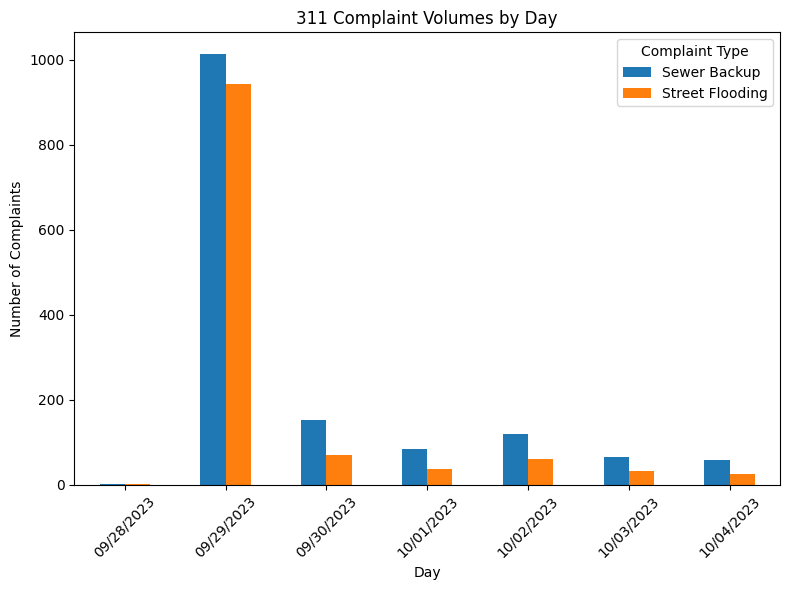

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
grouped_complaints.plot(kind='bar', ax=ax)

ax.set_title('311 Complaint Volumes by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Complaints')
ax.set_xticklabels(grouped_complaints.index, rotation=45)
ax.legend(title='Complaint Type')

plt.tight_layout()
plt.show()

##### Should complaints on the 28th be dropped? Were these random noise or early indicators? 

In [70]:
complaints.query("Day == '09/28/2023'")

,Date,Desc,Address,Zip,Boro,Lat,Lon,Geom,Day,Hour
5737,09/28/2023 11:50:00 PM,Sewer Backup,810 EAST 215 STREET,10467.0,BRONX,40.879610,-73.860849,"(40.87960996373096, -73.86084877502054)",09/28/2023,23
5739,09/28/2023 11:20:55 PM,Street Flooding,198-05 30 AVENUE,11358.0,QUEENS,40.769693,-73.791924,"(40.769692646012764, -73.7919244251974)",09/28/2023,23
5741,09/28/2023 11:13:42 PM,Street Flooding,64 CANTERBURY AVENUE,10314.0,STATEN ISLAND,40.615887,-74.151154,"(40.61588749922905, -74.15115412846022)",09/28/2023,23
5745,09/28/2023 10:25:18 PM,Sewer Backup,82 EAST 42 STREET,11203.0,BROOKLYN,40.654016,-73.938376,"(40.65401586830134, -73.93837577722384)",09/28/2023,22


In [19]:
# Depends on running precipitation cells below
precip.query("Day == '09/28/2023'")

,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,09/28/2023,8:51 PM,62 °F,57 °F,84 %,E,5 mph,0 mph,30.23 in,0.0 in,Cloudy
1,09/28/2023,9:51 PM,59 °F,57 °F,93 %,NE,10 mph,0 mph,30.22 in,0.1 in,Heavy Rain
2,09/28/2023,10:08 PM,59 °F,57 °F,93 %,ESE,8 mph,0 mph,30.23 in,0.1 in,Heavy T-Storm
3,09/28/2023,10:28 PM,58 °F,58 °F,100 %,E,7 mph,0 mph,30.22 in,0.3 in,Heavy Rain
4,09/28/2023,10:51 PM,59 °F,57 °F,93 %,NNE,8 mph,0 mph,30.23 in,0.4 in,Light Rain
5,09/28/2023,11:51 PM,59 °F,58 °F,96 %,NNE,10 mph,0 mph,30.20 in,0.0 in,Rain


No. The four complaints came in after the thunderstorms started on 9/28. 

### Convert to geo-dataframe and map

In [386]:
geometry = [Point(xy) for xy in zip(complaints.Lon, complaints.Lat)]
complaints_gdf = gpd.GeoDataFrame(complaints, crs="EPSG:4326", geometry=geometry)

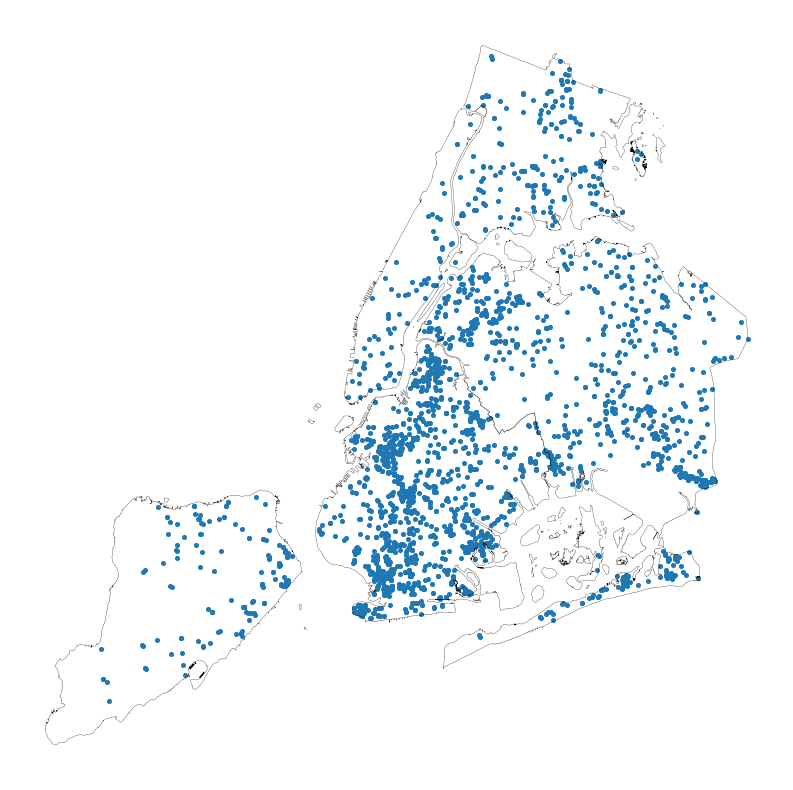

In [387]:
fig, ax = plt.subplots(figsize=(10, 8))

complaints_gdf.plot(ax=ax, legend=True,markersize=7)
boro.plot(ax=ax, facecolor='None', linewidth=.2)
ax.axis('off')
plt.tight_layout()

##### Pull out Brooklyn for analysis

In [388]:
brooklyn = boro.query("boro_name == 'Brooklyn'")
complaints_brooklyn = gpd.clip(complaints_gdf, brooklyn)

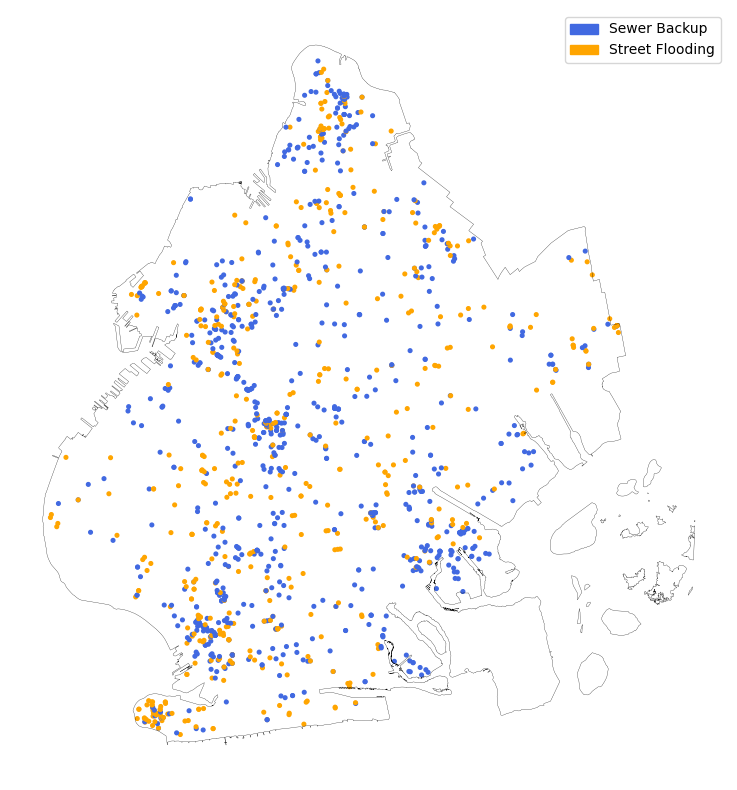

In [389]:
fig, ax = plt.subplots(figsize=(10, 8))

color_series =complaints_brooklyn.Desc.apply(lambda x: 'royalblue' if x =='Sewer Backup' else 'orange')
complaints_brooklyn.plot(ax=ax, color=color_series, markersize=7)
brooklyn.plot(ax=ax, facecolor='None', linewidth=.2)
ax.axis('off')
pop_a = mpatches.Patch(color='royalblue', label='Sewer Backup') 
pop_b = mpatches.Patch(color='orange', label='Street Flooding') 
plt.legend(handles=[pop_a,pop_b]) 
plt.tight_layout()

### Precipitation Data (JFK Airport) - Read, Prep, Explore

In [391]:
#Data pulled from: https://www.wunderground.com/history/daily/KJFK/date/2023-9-29
precip = pd.read_csv("C:/Users/Prisc/Desktop/NYC_Flood/precip_underground_weather.csv")
precip.head()

,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,09/28/2023,8:51 PM,62 °F,57 °F,84 %,E,5 mph,0 mph,30.23 in,0.0 in,Cloudy
1,09/28/2023,9:51 PM,59 °F,57 °F,93 %,NE,10 mph,0 mph,30.22 in,0.1 in,Heavy Rain
2,09/28/2023,10:08 PM,59 °F,57 °F,93 %,ESE,8 mph,0 mph,30.23 in,0.1 in,Heavy T-Storm
3,09/28/2023,10:28 PM,58 °F,58 °F,100 %,E,7 mph,0 mph,30.22 in,0.3 in,Heavy Rain
4,09/28/2023,10:51 PM,59 °F,57 °F,93 %,NNE,8 mph,0 mph,30.23 in,0.4 in,Light Rain


In [20]:
def extract_hour_2(record):
    record_start = int(record.split(':')[0])
    if record[-2:] == 'PM' and record_start < 12:
        hour = record_start + 12
    elif record[-2:] == 'AM' and record_start == 12:
        hour = 0
    else:
        hour = record_start
    return hour

def extract_rain_depth(record):
    rain = float(record.split(' ')[0])
    return rain

In [21]:
precip['Hour'] = precip.Time.apply(lambda x: extract_hour_2(x))
precip['rain_inches'] = precip['Precip.'].apply(lambda x: extract_rain_depth(x))

In [22]:
precip_29 = precip.query("Day == '09/29/2023'")
precip_29

,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Hour,rain_inches
6,09/29/2023,12:37 AM,59 °F,57 °F,93 %,ENE,9 mph,0 mph,30.22 in,0.1 in,Light Rain with Thunder,0,0.1
7,09/29/2023,12:51 AM,58 °F,57 °F,97 %,NNE,13 mph,0 mph,30.20 in,0.1 in,Heavy T-Storm,0,0.1
8,09/29/2023,1:15 AM,58 °F,57 °F,97 %,NE,14 mph,0 mph,30.19 in,0.1 in,Heavy Rain,1,0.1
9,09/29/2023,1:31 AM,58 °F,58 °F,100 %,E,12 mph,0 mph,30.20 in,0.3 in,Heavy T-Storm,1,0.3
10,09/29/2023,1:51 AM,58 °F,58 °F,100 %,ENE,9 mph,0 mph,30.20 in,0.7 in,Heavy T-Storm,1,0.7
11,09/29/2023,2:01 AM,59 °F,59 °F,100 %,ENE,17 mph,22 mph,30.18 in,0.2 in,Heavy T-Storm,2,0.2
12,09/29/2023,2:16 AM,59 °F,59 °F,100 %,ENE,22 mph,0 mph,30.16 in,0.8 in,Heavy Rain / Windy,2,0.8
13,09/29/2023,2:51 AM,60 °F,59 °F,96 %,NE,10 mph,26 mph,30.19 in,1.2 in,Rain,2,1.2
14,09/29/2023,3:22 AM,60 °F,60 °F,100 %,NNE,13 mph,0 mph,30.15 in,0.2 in,Heavy Rain,3,0.2
15,09/29/2023,3:51 AM,60 °F,60 °F,100 %,NNE,14 mph,0 mph,30.15 in,0.3 in,Rain,3,0.3


##### Reduce time resolution to sum of rainfall by hour

In [23]:
hourly_precip_29 = precip_29.groupby("Hour").sum("rain_inches").reset_index()
hourly_precip_29

,Hour,rain_inches
0,0,0.2
1,1,1.1
2,2,2.2
3,3,0.5
4,4,0.1
5,5,0.1
6,6,0.7
7,7,0.8
8,8,0.6
9,9,0.5


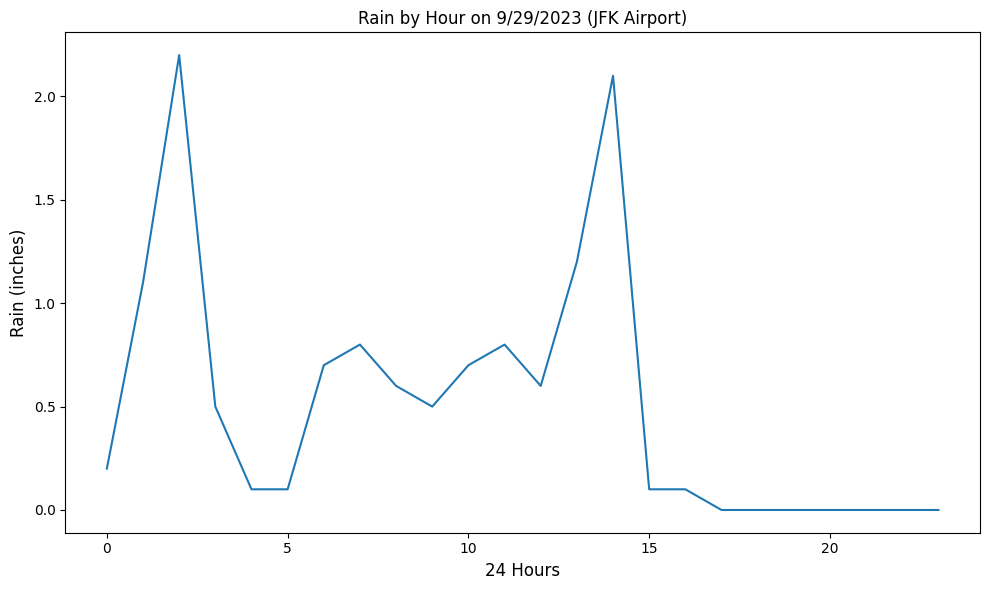

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('24 Hours', fontsize=12)
plt.ylabel('Rain (inches)', fontsize=12)
plt.title('Rain by Hour on 9/29/2023 (JFK Airport)')
plt.plot(hourly_precip_29['Hour'], hourly_precip_29['rain_inches'])
plt.tight_layout()

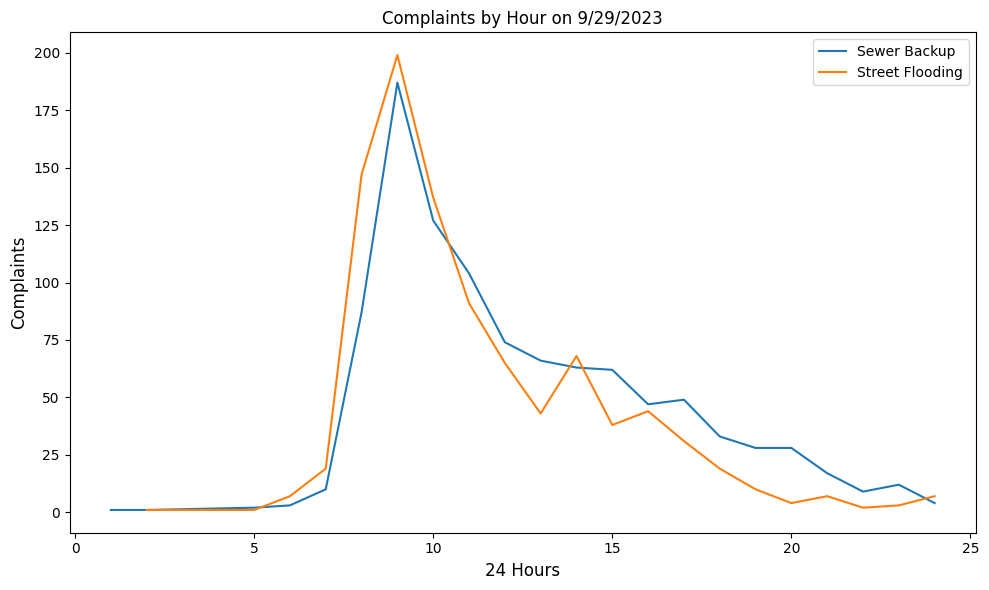

In [392]:
backup_by_hour_29 = complaints.query('Desc == "Sewer Backup" & Day == "09/29/2023"').groupby('Hour').size().reset_index(name='Complaints')
hours = backup_by_hour_29['Hour'].values
cnt = backup_by_hour_29['Complaints'].values

sf_by_hour_29 = complaints.query('Desc == "Street Flooding" & Day == "09/29/2023"').groupby('Hour').size().reset_index(name='Complaints')
sf_hours = sf_by_hour_29['Hour'].values
sf_cnt = sf_by_hour_29['Complaints'].values

dc_by_hour_29 = complaints.query('Desc == "Drain Clog" & Day == "09/29/2023"').groupby('Hour').size().reset_index(name='Complaints')
dc_hours = dc_by_hour_29['Hour'].values
dc_cnt = dc_by_hour_29['Complaints'].values

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('24 Hours', fontsize=12)
plt.ylabel('Complaints', fontsize=12)
plt.title('Complaints by Hour on 9/29/2023')
plt.plot(hours, cnt)
plt.plot(sf_hours, sf_cnt)
plt.plot(dc_hours, dc_cnt)
plt.legend(['Sewer Backup', 'Street Flooding'], loc="upper right")
plt.tight_layout()

# Hexagon Intensity Mapping

In [393]:
# Reusable function block to make hex mapping easier

def apply_h3(df, resolution):
    df["hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["Lat"], row["Lon"], resolution=resolution), axis = 1)
    df["hex_lat"] = df.apply(lambda row: h3.h3_to_geo(row["hex_id"])[0], axis = 1) 
    df["hex_lon"] = df.apply(lambda row: h3.h3_to_geo(row["hex_id"])[1], axis = 1)
    
    return df[["Desc", "hex_id","hex_lat","hex_lon"]]

def prep_counts(df, desc=None):
    if desc:
        hex_df_a = df.groupby(['Desc','hex_id','hex_lat','hex_lon']).size().reset_index(name='cnt')
        hex_df = hex_df_a.query(f"Desc == '{desc}'")
    else:
        hex_df = df.groupby(['hex_id','hex_lat','hex_lon']).size().reset_index(name='cnt')
    return hex_df
    

def map_hexagons(df, title, resolution, boro_layer, desc=None):
    mod_df = apply_h3(df.copy(), resolution=resolution)    
    hex_df = prep_counts(df=mod_df, desc=desc)
   
    geometry = [Point(xy) for xy in zip(hex_df.hex_lon, hex_df.hex_lat)]
    map_df = gpd.GeoDataFrame(hex_df, crs="EPSG:4326", geometry=geometry)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    if resolution == 10:
        map_df.plot(c=map_df.cnt, ax=ax, markersize=8, marker="h", cmap='YlGnBu',legend=True)
    elif resolution == 9:
        map_df.plot(c=map_df.cnt, ax=ax, markersize=80, marker="h", cmap='YlGnBu')
    else:
        return "resolution must be equal to 9 or 10"
    boro_layer.plot(ax=ax, facecolor='None', linewidth=.2)
    ax.axis('off')
    plt.title(f"{title}", loc="center")
    plt.tight_layout()
    return int(map_df.cnt.min()), int(map_df.cnt.max())

(1, 21)

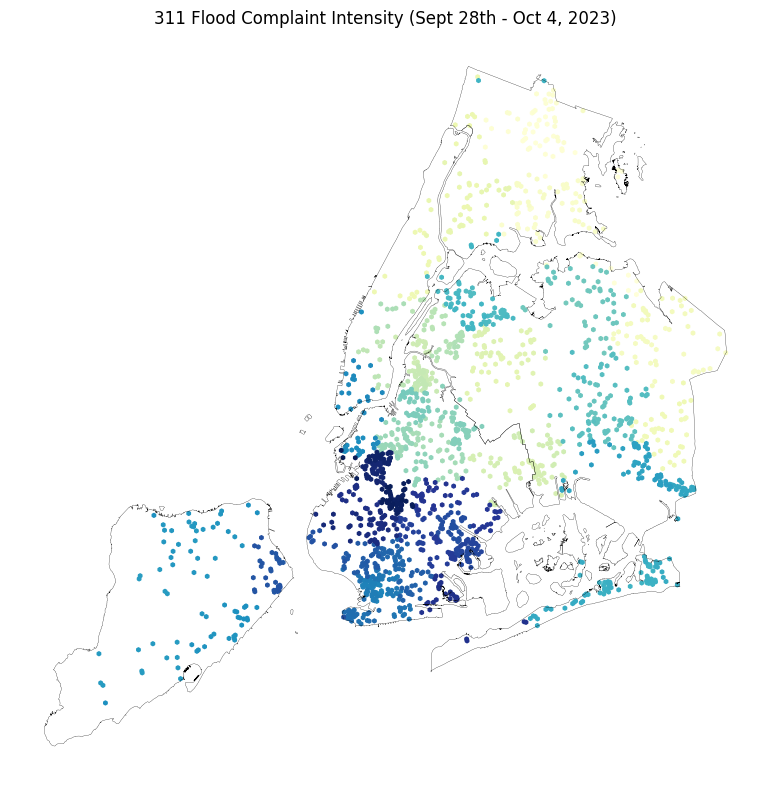

In [347]:
map_hexagons(df=complaints, 
             title="311 Flood Complaint Intensity (Sept 28th - Oct 4, 2023)", 
             resolution=10, 
             boro_layer=boro,
             desc=None)

In [355]:
complaints.groupby('Boro').size().reset_index(name='Complaints')

,Boro,Complaints
0,BRONX,215
1,BROOKLYN,1379
2,MANHATTAN,73
3,QUEENS,830
4,STATEN ISLAND,156
5,Unspecified,10


(1, 21)

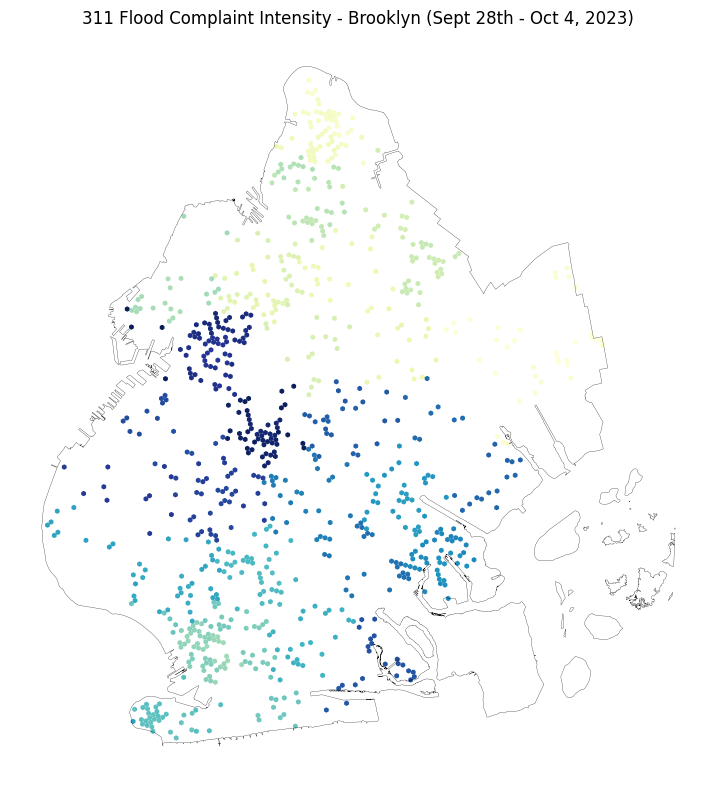

In [303]:
map_hexagons(df=complaints_brooklyn, 
             title="311 Flood Complaint Intensity - Brooklyn (Sept 28th - Oct 4, 2023)", 
             resolution=10, 
             boro_layer=brooklyn,
             desc=None)

(1, 40)

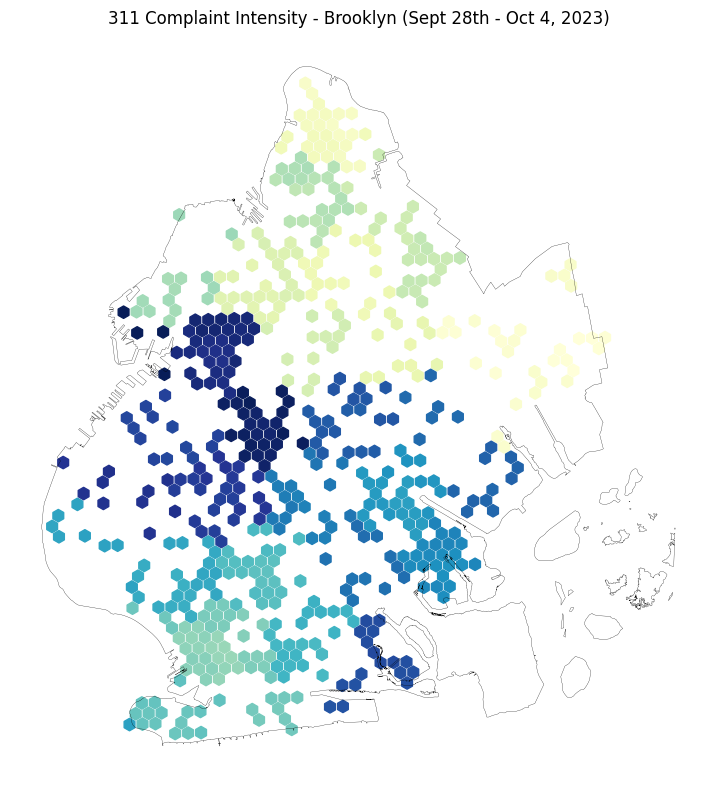

In [304]:
map_hexagons(df=complaints_brooklyn, 
             title="311 Complaint Intensity - Brooklyn (Sept 28th - Oct 4, 2023)", 
             resolution=9, 
             boro_layer=brooklyn,
             desc=None)

(1, 17)

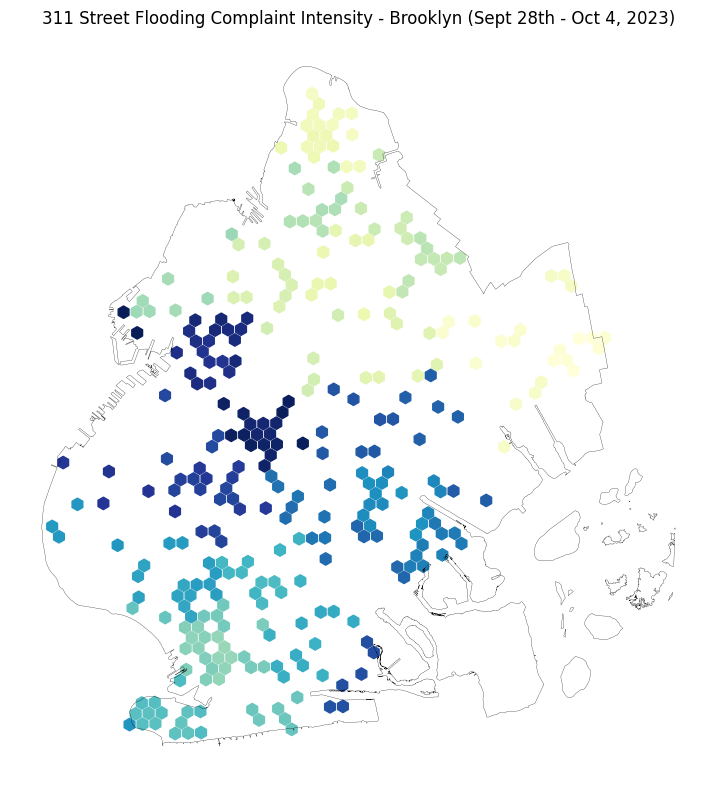

In [305]:
map_hexagons(df=complaints_brooklyn, 
             title="311 Street Flooding Complaint Intensity - Brooklyn (Sept 28th - Oct 4, 2023)", 
             resolution=9, 
             boro_layer=brooklyn,
             desc="Street Flooding")

(1, 23)

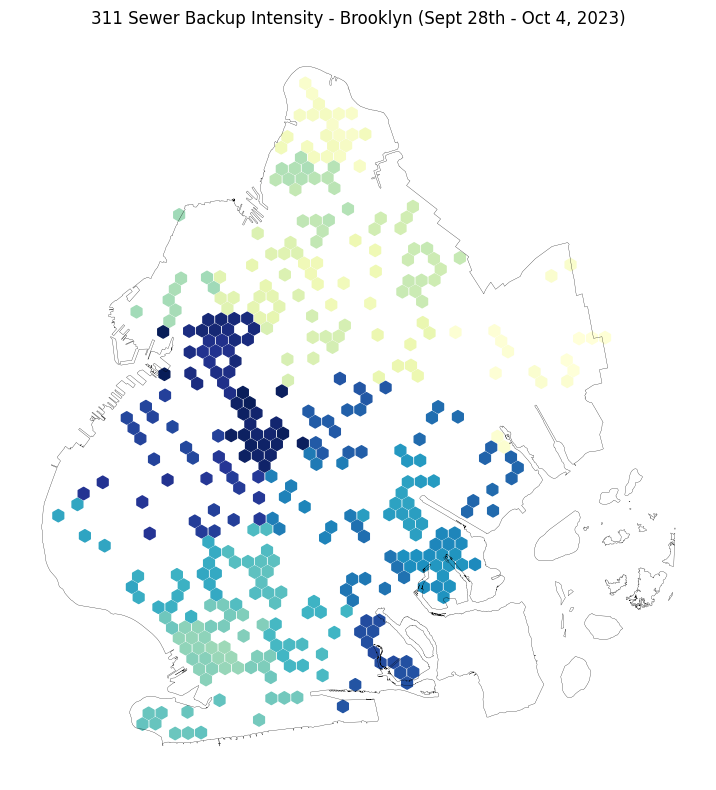

In [306]:
map_hexagons(df=complaints_brooklyn, 
             title="311 Sewer Backup Intensity - Brooklyn (Sept 28th - Oct 4, 2023)", 
             resolution=9,
             boro_layer=brooklyn,
             desc="Sewer Backup")

In [295]:
complaints.query('Day == "09/29/2023"').groupby(["Hour"]).size()

Hour
1       1
2       2
4       1
5       3
6      10
7      29
8     234
9     386
10    264
11    195
12    139
13    109
14    131
15    100
16     91
17     80
18     52
19     38
20     32
21     24
22     11
23     15
24     11
dtype: int64

In [321]:
rush_hour = complaints.query('Day == "09/29/2023" & 7<Hour<10')

(1, 5)

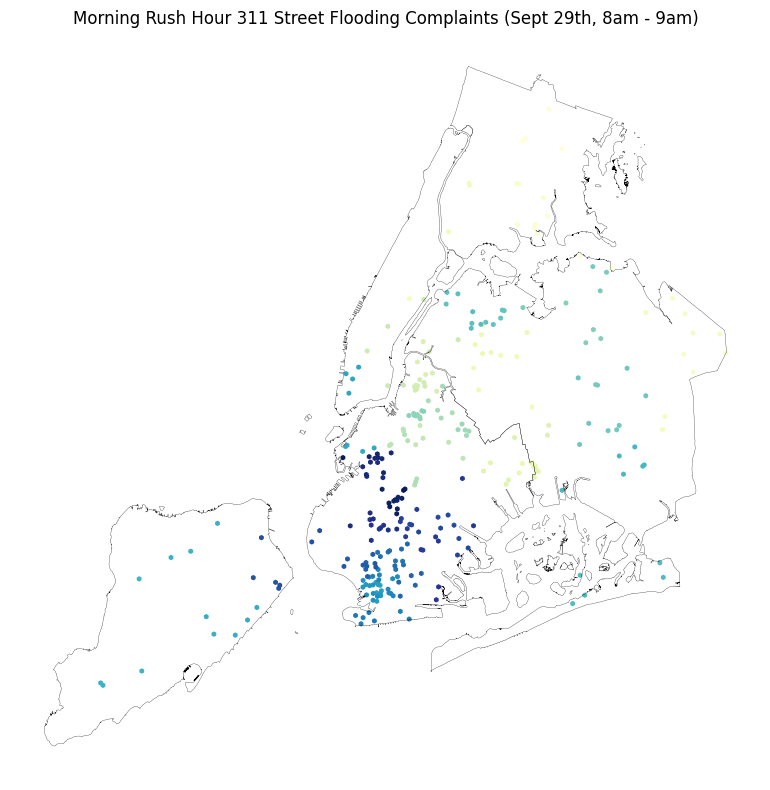

In [323]:
map_hexagons(df=rush_hour, 
             title="Morning Rush Hour 311 Street Flooding Complaints (Sept 29th, 8am - 9am)", 
             resolution=10,
             boro_layer=boro,
             desc="Street Flooding")

##### Addressing isolated clogged drains?
- Clogs reports occuring after the precipitation event were likely caused by the precipitation carrying debris into the drains. And should be dropped from the analysis
- Clogs occuring during the precipitation can be coded as potential indicator of 'street flooding' as they co-occur during rain events. 
- Clogs reported before precipitation can be dropped. 

##### Potential Methodology
- Near tool on clogged drain to nearest backup
- Plot histogram
- Select upper threshold at 1.5 - 2 standard deviations of mean
- Remove clogs outside of time window and above threshold

##### MS4 Handling? 
- Convert MS4 areas to geopackage for import into geopandas
- Intesect complaints with MS4 areas to catagorize and group points. Important to distinguish between storm drainage and combined drainage and group points into "sewersheds" for related causes. 
- For combined sewersheds, attempt to classify according to treatment plant
- Pull in tide gauges, river gauges, discharge violations to establish time relationship with upstream issues

##### More Thoughts
- Shed 'natrual hydrology' understanding of urban drainage systems
- Establish relationships between different complaint types in time and space
- Detect upstream/downstream interactions
- Tie manmade system into natural hydrology system
- Shine light on basement flooding (claims driver) and how much more widespread it is than surface observations.
- Drive upstairs/downstairs story
- Identify relative peak of flood (different by area?)
- Create maximum flood extent at surface
- Create maximum flood extent of basements